In [59]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import sklearn.model_selection
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [60]:
dataset_path = 'Admission_Predict_Ver1.1.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
dataset = raw_dataset.copy() # Borrar el raw copy, es para poder hacer prints sobre esto y no tener datos distintos

# Split into vectors the dataset. y_all being the chance, x_all the other cols
# Y also gets categorized in 5 classes as output asks for.
bins = pd.cut(dataset.pop("Chance of Admit "), bins=np.array([0, 0.5, 0.65, 0.8, 0.9, 1]), labels=[0,1,2,3,4])
y_all = keras.utils.to_categorical(bins, num_classes=5)
x_all = dataset

# Split dataset into train and tests. 33% used as asked.
x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x_all, y_all, test_size=0.33, random_state=0)

In [62]:
y_all

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [63]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=tuple([x_train.shape[1]])),
    layers.Dropout(0.2),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dropout(0.2),
    layers.Dense(5, activation=tf.nn.softmax)
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mean_absolute_error', 'mean_squared_error', 'categorical_accuracy'])
  return model

In [64]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 325       
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=200, validation_data=(x_valid, y_valid), verbose=1)

Train on 335 samples, validate on 165 samples
Epoch 1/200
335/335 [==============================] - 0s 1ms/sample - loss: 4.0232 - mean_absolute_error: 0.2841 - mean_squared_error: 0.2800 - categorical_accuracy: 0.2866 - val_loss: 3.8084 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 2/200
335/335 [==============================] - 0s 18us/sample - loss: 3.7958 - mean_absolute_error: 0.2634 - mean_squared_error: 0.2596 - categorical_accuracy: 0.3403 - val_loss: 3.8084 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 3/200
335/335 [==============================] - 0s 18us/sample - loss: 3.9620 - mean_absolute_error: 0.2810 - mean_squared_error: 0.2749 - categorical_accuracy: 0.2985 - val_loss: 3.8084 - val_mean_absolute_error: 0.2376 - val_mean_squared_error: 0.2376 - val_categorical_accuracy: 0.4061
Epoch 4/200
335/335 [==============================] - 0s 30us/samp

Epoch 29/200
335/335 [==============================] - 0s 37us/sample - loss: 3.1321 - mean_absolute_error: 0.2512 - mean_squared_error: 0.2432 - categorical_accuracy: 0.3672 - val_loss: 3.2916 - val_mean_absolute_error: 0.2454 - val_mean_squared_error: 0.2396 - val_categorical_accuracy: 0.3879
Epoch 30/200
335/335 [==============================] - 0s 33us/sample - loss: 3.4325 - mean_absolute_error: 0.2640 - mean_squared_error: 0.2576 - categorical_accuracy: 0.3403 - val_loss: 3.3198 - val_mean_absolute_error: 0.2453 - val_mean_squared_error: 0.2407 - val_categorical_accuracy: 0.3879
Epoch 31/200
335/335 [==============================] - 0s 35us/sample - loss: 3.2234 - mean_absolute_error: 0.2639 - mean_squared_error: 0.2545 - categorical_accuracy: 0.3373 - val_loss: 3.3648 - val_mean_absolute_error: 0.2446 - val_mean_squared_error: 0.2415 - val_categorical_accuracy: 0.3879
Epoch 32/200
335/335 [==============================] - 0s 30us/sample - loss: 3.2010 - mean_absolute_error: 

Epoch 57/200
335/335 [==============================] - 0s 19us/sample - loss: 2.8236 - mean_absolute_error: 0.2785 - mean_squared_error: 0.2615 - categorical_accuracy: 0.3015 - val_loss: 2.2378 - val_mean_absolute_error: 0.2472 - val_mean_squared_error: 0.2288 - val_categorical_accuracy: 0.3939
Epoch 58/200
335/335 [==============================] - 0s 20us/sample - loss: 2.6366 - mean_absolute_error: 0.2669 - mean_squared_error: 0.2482 - categorical_accuracy: 0.3373 - val_loss: 1.7278 - val_mean_absolute_error: 0.2511 - val_mean_squared_error: 0.2262 - val_categorical_accuracy: 0.3879
Epoch 59/200
335/335 [==============================] - 0s 21us/sample - loss: 2.6208 - mean_absolute_error: 0.2734 - mean_squared_error: 0.2549 - categorical_accuracy: 0.3224 - val_loss: 1.5820 - val_mean_absolute_error: 0.2491 - val_mean_squared_error: 0.2269 - val_categorical_accuracy: 0.4000
Epoch 60/200
335/335 [==============================] - 0s 23us/sample - loss: 2.8228 - mean_absolute_error: 

Epoch 85/200
335/335 [==============================] - 0s 20us/sample - loss: 1.6983 - mean_absolute_error: 0.2996 - mean_squared_error: 0.2539 - categorical_accuracy: 0.2687 - val_loss: 0.6753 - val_mean_absolute_error: 0.3074 - val_mean_squared_error: 0.1859 - val_categorical_accuracy: 0.2303
Epoch 86/200
335/335 [==============================] - 0s 19us/sample - loss: 1.5706 - mean_absolute_error: 0.3038 - mean_squared_error: 0.2507 - categorical_accuracy: 0.2418 - val_loss: 0.6443 - val_mean_absolute_error: 0.2956 - val_mean_squared_error: 0.1794 - val_categorical_accuracy: 0.3091
Epoch 87/200
335/335 [==============================] - 0s 26us/sample - loss: 1.4947 - mean_absolute_error: 0.2839 - mean_squared_error: 0.2303 - categorical_accuracy: 0.3104 - val_loss: 0.6125 - val_mean_absolute_error: 0.2902 - val_mean_squared_error: 0.1724 - val_categorical_accuracy: 0.3455
Epoch 88/200
335/335 [==============================] - 0s 23us/sample - loss: 1.6008 - mean_absolute_error: 

Epoch 113/200
335/335 [==============================] - 0s 29us/sample - loss: 0.7418 - mean_absolute_error: 0.3068 - mean_squared_error: 0.1851 - categorical_accuracy: 0.3075 - val_loss: 0.4915 - val_mean_absolute_error: 0.3150 - val_mean_squared_error: 0.1570 - val_categorical_accuracy: 0.4000
Epoch 114/200
335/335 [==============================] - 0s 26us/sample - loss: 0.6890 - mean_absolute_error: 0.3100 - mean_squared_error: 0.1847 - categorical_accuracy: 0.3313 - val_loss: 0.4935 - val_mean_absolute_error: 0.3158 - val_mean_squared_error: 0.1575 - val_categorical_accuracy: 0.4061
Epoch 115/200
335/335 [==============================] - 0s 25us/sample - loss: 0.6349 - mean_absolute_error: 0.3008 - mean_squared_error: 0.1753 - categorical_accuracy: 0.3254 - val_loss: 0.4929 - val_mean_absolute_error: 0.3156 - val_mean_squared_error: 0.1574 - val_categorical_accuracy: 0.4061
Epoch 116/200
335/335 [==============================] - 0s 30us/sample - loss: 0.7508 - mean_absolute_err

Epoch 141/200
335/335 [==============================] - 0s 19us/sample - loss: 0.5058 - mean_absolute_error: 0.3053 - mean_squared_error: 0.1585 - categorical_accuracy: 0.3910 - val_loss: 0.4886 - val_mean_absolute_error: 0.3159 - val_mean_squared_error: 0.1563 - val_categorical_accuracy: 0.4061
Epoch 142/200
335/335 [==============================] - 0s 27us/sample - loss: 0.5431 - mean_absolute_error: 0.3113 - mean_squared_error: 0.1661 - categorical_accuracy: 0.3552 - val_loss: 0.4869 - val_mean_absolute_error: 0.3152 - val_mean_squared_error: 0.1558 - val_categorical_accuracy: 0.4061
Epoch 143/200
335/335 [==============================] - 0s 23us/sample - loss: 0.5475 - mean_absolute_error: 0.3115 - mean_squared_error: 0.1658 - categorical_accuracy: 0.3463 - val_loss: 0.4867 - val_mean_absolute_error: 0.3151 - val_mean_squared_error: 0.1557 - val_categorical_accuracy: 0.4061
Epoch 144/200
335/335 [==============================] - 0s 27us/sample - loss: 0.5294 - mean_absolute_err

Epoch 169/200
335/335 [==============================] - 0s 29us/sample - loss: 0.4955 - mean_absolute_error: 0.3056 - mean_squared_error: 0.1561 - categorical_accuracy: 0.3761 - val_loss: 0.4739 - val_mean_absolute_error: 0.3092 - val_mean_squared_error: 0.1519 - val_categorical_accuracy: 0.4061
Epoch 170/200
335/335 [==============================] - 0s 22us/sample - loss: 0.5011 - mean_absolute_error: 0.3048 - mean_squared_error: 0.1561 - categorical_accuracy: 0.3731 - val_loss: 0.4710 - val_mean_absolute_error: 0.3075 - val_mean_squared_error: 0.1510 - val_categorical_accuracy: 0.4061
Epoch 171/200
335/335 [==============================] - 0s 25us/sample - loss: 0.4899 - mean_absolute_error: 0.3043 - mean_squared_error: 0.1550 - categorical_accuracy: 0.3761 - val_loss: 0.4707 - val_mean_absolute_error: 0.3073 - val_mean_squared_error: 0.1509 - val_categorical_accuracy: 0.4061
Epoch 172/200
335/335 [==============================] - 0s 21us/sample - loss: 0.4911 - mean_absolute_err

Epoch 197/200
335/335 [==============================] - 0s 30us/sample - loss: 0.4703 - mean_absolute_error: 0.2976 - mean_squared_error: 0.1478 - categorical_accuracy: 0.3881 - val_loss: 0.4620 - val_mean_absolute_error: 0.3001 - val_mean_squared_error: 0.1478 - val_categorical_accuracy: 0.4061
Epoch 198/200
335/335 [==============================] - 0s 23us/sample - loss: 0.4943 - mean_absolute_error: 0.2999 - mean_squared_error: 0.1544 - categorical_accuracy: 0.3910 - val_loss: 0.4651 - val_mean_absolute_error: 0.3038 - val_mean_squared_error: 0.1490 - val_categorical_accuracy: 0.4061
Epoch 199/200
335/335 [==============================] - 0s 17us/sample - loss: 0.4778 - mean_absolute_error: 0.3021 - mean_squared_error: 0.1504 - categorical_accuracy: 0.3940 - val_loss: 0.4617 - val_mean_absolute_error: 0.2998 - val_mean_squared_error: 0.1477 - val_categorical_accuracy: 0.4061
Epoch 200/200
335/335 [==============================] - 0s 19us/sample - loss: 0.4709 - mean_absolute_err

In [66]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'categorical_accuracy', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_categorical_accuracy'])

In [67]:
# This is useless, it's just for getting the data in the last epoch (200) and see its error
# We can also see this values in the epoch 200 while it was training
x_test = dataset
y_test = model.predict(x_test)

y_test

array([[0.18254209, 0.21040256, 0.23061942, 0.18943335, 0.18700258],
       [0.18254209, 0.21040256, 0.23061942, 0.18943335, 0.18700258],
       [0.18254209, 0.21040256, 0.23061942, 0.18943335, 0.18700258],
       ...,
       [0.07341694, 0.22942235, 0.3107197 , 0.2025939 , 0.18384705],
       [0.0905766 , 0.22738507, 0.29398286, 0.20165081, 0.18640468],
       [0.07241676, 0.22951938, 0.31178495, 0.20262392, 0.18365498]],
      dtype=float32)

In [68]:
# Mean squared error
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_all, y_test)
cm

0.14724374

In [69]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.argmax(y_all, axis=1), np.argmax(y_test, axis=1))
accuracy * 100

40.0

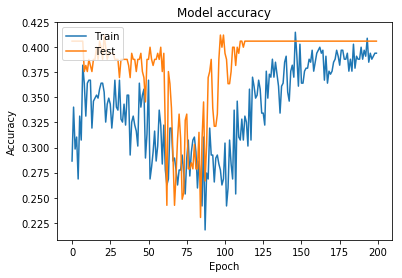

In [70]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

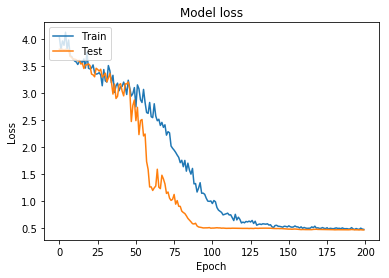

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()